
# Problem statement

In [1]:
# Import Liberies

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
# Data Gathering

In [4]:
df = pd.read_csv("spam.csv",encoding='latin-1')
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

In [6]:
# data Cleaning

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
# Drop the not used features

In [9]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [10]:
df.sample(5)

,v1,v2
2503,ham,Fwiw the reason I'm only around when it's time...
3025,ham,I finished my lunch already. U wake up already?
2017,ham,"Better than bb. If he wont use it, his wife wi..."
1254,ham,What your plan for pongal?
1964,ham,Honeybee Said: *I'm d Sweetest in d World* God...


In [11]:
# renaming Cols

In [12]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
1520,spam,"URGENT! Your Mobile No was awarded a å£2,000 B..."
2227,ham,Oh k.k..where did you take test?
3619,ham,I meant as an apology from me for texting you ...
3398,ham,"Yeah we wouldn't leave for an hour at least, h..."
4215,ham,Er mw im filled tuth is aight


In [13]:
# Enconding Target Columns

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
encoder = LabelEncoder()
encoder

LabelEncoder()

In [16]:
df['target'] = encoder.fit_transform(df['target'])

In [17]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
df.isnull().sum() # missing value 

target    0
text      0
dtype: int64

In [19]:
df.duplicated().sum() # check the duplicate value 

403

In [20]:
# remove duplicate 
df = df.drop_duplicates(keep='first')
df

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [21]:
df.duplicated().sum()

0

In [22]:
df.shape

(5169, 2)

# EDA

In [23]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [24]:
df.target.value_counts()

0    4516
1     653
Name: target, dtype: int64

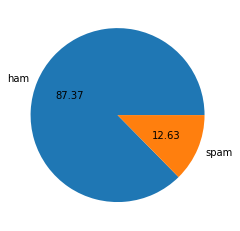

In [25]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [26]:
# in this dataset as a showing in pie chart 88%- SMS is not spam & 12.5% is spam SMS

# feature extrcation 

In [27]:
import nltk

In [28]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [29]:
df['text'].apply(len)

0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: text, Length: 5169, dtype: int64

In [30]:
df['num_characters'] = df['text'].apply(len) # num of charts

In [31]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [32]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [33]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [34]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [35]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [36]:
df[['num_characters','num_words','num_sentences']].describe() 

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [37]:
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()  # this is for Ham messages

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [38]:
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()  # this is for Spam mesages

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [39]:
# spam msg are avg by longer than ham msges

# Data visulization 

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

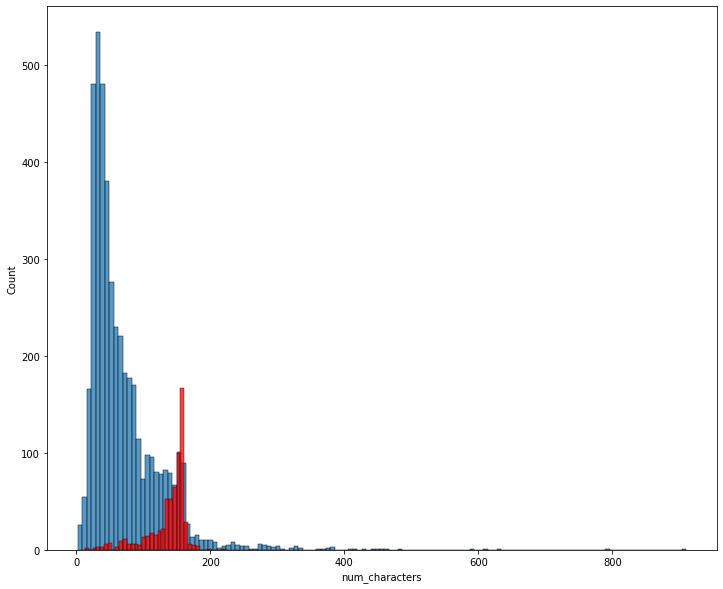

In [40]:
plt.figure(figsize=(12,10))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

In [41]:
# ham msg is low spam on avag is more

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

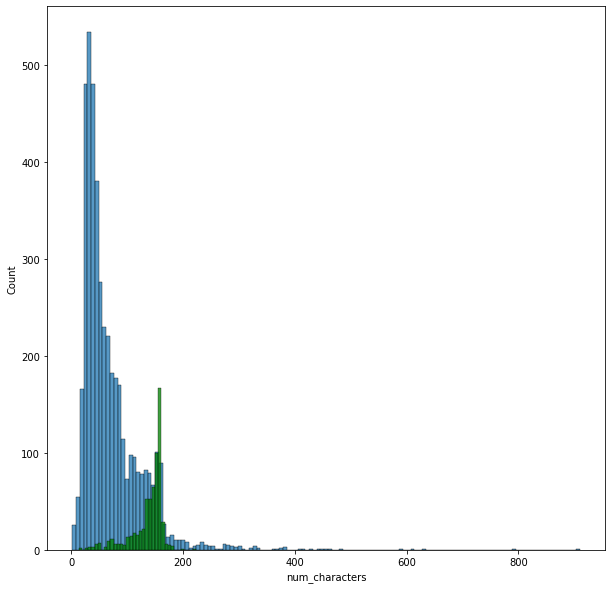

In [42]:
x = df[df['target']==0]['num_characters']
y = df[df['target']==1]['num_characters']
plt.figure(figsize=(10,10))
sns.histplot(x)
sns.histplot(y,color='green')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

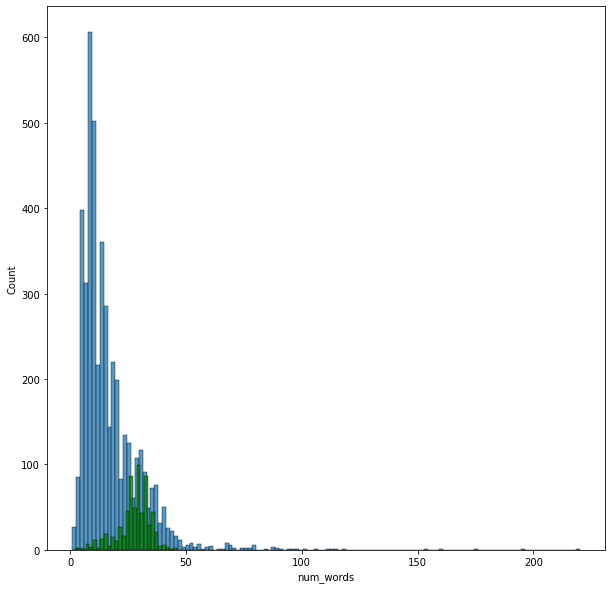

In [43]:
x = df[df['target']==0]['num_words']
y = df[df['target']==1]['num_words']
plt.figure(figsize=(10,10))
sns.histplot(x)
sns.histplot(y,color='green')

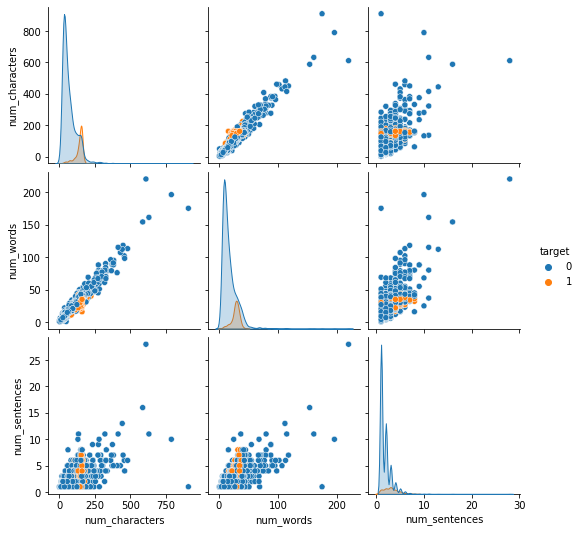

In [44]:
sns.pairplot(df,hue='target')   # num_char is somewhatb liner in data there is outliers 

<AxesSubplot:>

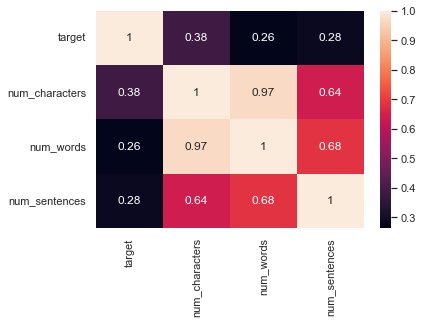

In [45]:
sns.set()
x=df.corr() # num_char col will keep
sns.heatmap(x,annot=True)

In [46]:
# this indicted the num char is hardly come in the data set

# test data preprocessing

In [47]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords('english') and i not in string.punctuation:
            y.append(i)
    return y

In [48]:
from nltk.corpus import stopwords
import string

In [49]:
stopwords.words('english')[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [50]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [51]:
from nltk.stem.porter import PorterStemmer  
from nltk.stem import WordNetLemmatizer

In [52]:
lemm = WordNetLemmatizer()
ps = PorterStemmer()
print(lemm.lemmatize('historical'))
print(ps.stem('historical'))

historical
histor


In [53]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y =[]
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
    
    return " ".join(y)

In [54]:
transform_text('Go until jurong point, crazy.. Available only in bugis n great world,')

'go jurong point crazi avail bugi n great world'

In [55]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [56]:
df['transformed_text'] = df['text'].apply(transform_text)

In [57]:
df

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


In [58]:
from wordcloud import WordCloud    # which word is imp it will larger in the wordcloud

In [59]:
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [60]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

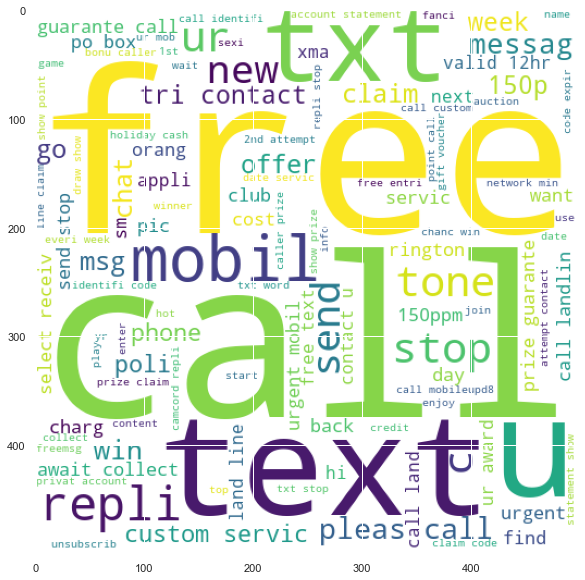

In [61]:
plt.figure(figsize=(15,10))
plt.imshow(spam_wc)

In [62]:
# from spam mesg

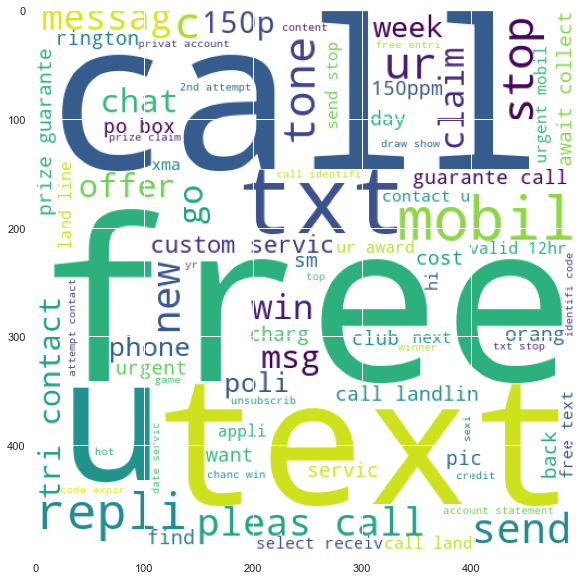

In [63]:
plt.figure(figsize=(10,10))
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=' '))
plt.imshow(spam_wc)

In [64]:
# For Ham 

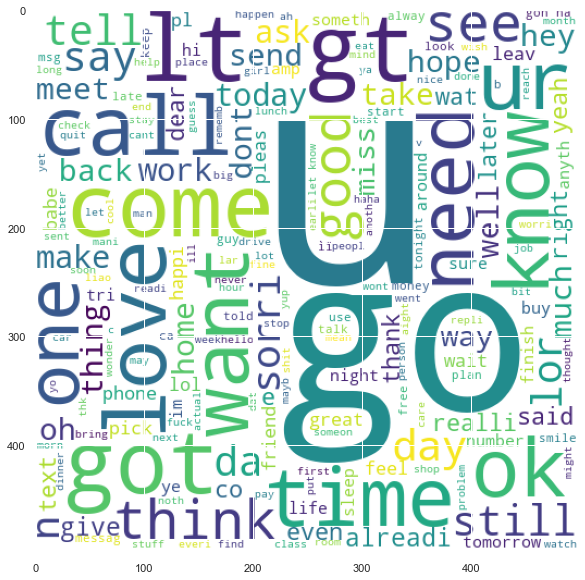

In [65]:
plt.figure(figsize=(10,10))
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=' '))
plt.imshow(ham_wc)

In [66]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [67]:
df[df['target']==1]['transformed_text']

2       free entri 2 wkli comp win fa cup final tkt 21...
5       freemsg hey darl 3 week word back like fun sti...
8       winner valu network custom select receivea pri...
9       mobil 11 month u r entitl updat latest colour ...
11      six chanc win cash 100 pound txt csh11 send co...
                              ...                        
5537    want explicit sex 30 sec ring 02073162414 cost...
5540    ask 3mobil 0870 chatlin inclu free min india c...
5547    contract mobil 11 mnth latest motorola nokia e...
5566    remind o2 get pound free call credit detail gr...
5567    2nd time tri 2 contact u pound prize 2 claim e...
Name: transformed_text, Length: 653, dtype: object

In [68]:
spam_corpus = []
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [69]:
spam_corpus

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [70]:
len(spam_corpus)

9939

In [71]:
from collections import Counter
Counter(spam_corpus)

Counter({'free': 191,
         'entri': 21,
         '2': 155,
         'wkli': 9,
         'comp': 8,
         'win': 48,
         'fa': 2,
         'cup': 3,
         'final': 14,
         'tkt': 2,
         '21st': 1,
         'may': 6,
         'text': 122,
         '87121': 2,
         'receiv': 31,
         'question': 9,
         'std': 6,
         'txt': 141,
         'rate': 26,
         'c': 45,
         'appli': 24,
         '08452810075over18': 1,
         'freemsg': 14,
         'hey': 5,
         'darl': 2,
         '3': 20,
         'week': 49,
         'word': 21,
         'back': 20,
         'like': 12,
         'fun': 8,
         'still': 5,
         'tb': 1,
         'ok': 5,
         'xxx': 10,
         'chg': 2,
         'send': 60,
         'rcv': 2,
         'winner': 13,
         'valu': 8,
         'network': 26,
         'custom': 42,
         'select': 26,
         'receivea': 1,
         'prize': 82,
         'reward': 9,
         'claim': 98,
         'cal

In [72]:
spam = pd.DataFrame(Counter(spam_corpus).most_common(30))
spam.head()

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122


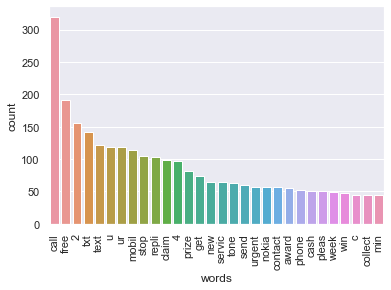

In [73]:
sns.barplot(x=spam[0],y=spam[1])
plt.xlabel('words')
plt.ylabel('count')
plt.xticks(rotation='vertical')
plt.show()

In [74]:
ham_corpus = []
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [75]:
ham_corpus

['go',
 'jurong',
 'point',
 'crazi',
 'avail',
 'bugi',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amor',
 'wat',
 'ok',
 'lar',
 'joke',
 'wif',
 'u',
 'oni',
 'u',
 'dun',
 'say',
 'earli',
 'hor',
 'u',
 'c',
 'alreadi',
 'say',
 'nah',
 'think',
 'goe',
 'usf',
 'live',
 'around',
 'though',
 'even',
 'brother',
 'like',
 'speak',
 'treat',
 'like',
 'aid',
 'patent',
 'per',
 'request',
 'mell',
 'oru',
 'minnaminungint',
 'nurungu',
 'vettam',
 'set',
 'callertun',
 'caller',
 'press',
 '9',
 'copi',
 'friend',
 'callertun',
 'gon',
 'na',
 'home',
 'soon',
 'want',
 'talk',
 'stuff',
 'anymor',
 'tonight',
 'k',
 'cri',
 'enough',
 'today',
 'search',
 'right',
 'word',
 'thank',
 'breather',
 'promis',
 'wont',
 'take',
 'help',
 'grant',
 'fulfil',
 'promis',
 'wonder',
 'bless',
 'time',
 'date',
 'sunday',
 'oh',
 'k',
 'watch',
 'eh',
 'u',
 'rememb',
 '2',
 'spell',
 'name',
 'ye',
 'v',
 'naughti',
 'make',
 'v',
 'wet',
 'fine',
 'thatåõ',
 'wa

In [76]:
len(ham_corpus)

35394

In [77]:
Counter(ham_corpus)

Counter({'go': 404,
         'jurong': 1,
         'point': 17,
         'crazi': 10,
         'avail': 13,
         'bugi': 7,
         'n': 120,
         'great': 97,
         'world': 28,
         'la': 7,
         'e': 77,
         'buffet': 2,
         'cine': 7,
         'got': 236,
         'amor': 1,
         'wat': 108,
         'ok': 217,
         'lar': 38,
         'joke': 14,
         'wif': 27,
         'u': 883,
         'oni': 4,
         'dun': 55,
         'say': 127,
         'earli': 33,
         'hor': 2,
         'c': 57,
         'alreadi': 90,
         'nah': 10,
         'think': 149,
         'goe': 26,
         'usf': 10,
         'live': 25,
         'around': 59,
         'though': 26,
         'even': 77,
         'brother': 17,
         'like': 234,
         'speak': 24,
         'treat': 19,
         'aid': 2,
         'patent': 1,
         'per': 9,
         'request': 6,
         'mell': 1,
         'oru': 2,
         'minnaminungint': 1,
         'nur

In [78]:
ham = pd.DataFrame(Counter(ham_corpus).most_common(30))
ham.head()

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287


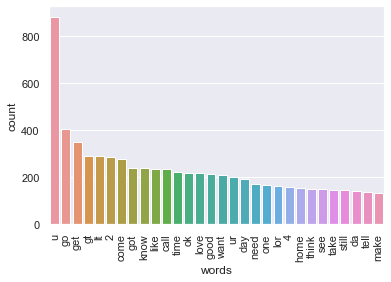

In [79]:
sns.barplot(x=ham[0],y=ham[1])
plt.xlabel('words')
plt.ylabel('count')
plt.xticks(rotation='vertical')
plt.show()

# Model Building

In [80]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [81]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [82]:
# text to vector convet
# bag of words
# tfidf
# wordtovec

In [83]:
# bag of words

In [84]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [85]:
x = cv.fit_transform(df['transformed_text']).toarray()

In [86]:
x.shape

(5169, 6708)

In [87]:
y = df['target'].values

In [88]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [89]:
from sklearn.model_selection import train_test_split

In [90]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [91]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [92]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [93]:
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix

In [94]:
gnb.fit(x_train,y_train)   
y_pred1 = gnb.predict(x_test)
print("accuracy_score is ",accuracy_score(y_test,y_pred1))
print("confution_matrix is \n",confusion_matrix(y_test,y_pred1))
print("precision score is ",precision_score(y_test,y_pred1))

accuracy_score is  0.8800773694390716
confution_matrix is 
 [[792 104]
 [ 20 118]]
precision score is  0.5315315315315315


In [95]:
# note : precision score is not so good 

In [96]:
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
print("accuracy_score is ",accuracy_score(y_test,y_pred2))
print("confution_matrix is \n",confusion_matrix(y_test,y_pred2))
print("precision score is ",precision_score(y_test,y_pred2))

accuracy_score is  0.9642166344294004
confution_matrix is 
 [[871  25]
 [ 12 126]]
precision score is  0.8344370860927153


In [97]:
# Precision is not so good in MNB

In [98]:
bnb.fit(x_train,y_train)   
y_pred3 = bnb.predict(x_test)
print("accuracy_score is ",accuracy_score(y_test,y_pred3))
print("confution_matrix is \n",confusion_matrix(y_test,y_pred3))
print("precision score is ",precision_score(y_test,y_pred3))

accuracy_score is  0.9700193423597679
confution_matrix is 
 [[893   3]
 [ 28 110]]
precision score is  0.9734513274336283


In [99]:
# BNB is good

In [100]:
#  using TFIDF 

In [101]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [102]:
x = tfidf.fit_transform(df['transformed_text']).toarray()

In [103]:
x.shape

(5169, 6708)

In [104]:
y=df['target'].values

In [105]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [106]:
from sklearn.model_selection import train_test_split

In [107]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [108]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,classification_report

In [109]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [110]:
gnb.fit(x_train,y_train)   
y_pred1 = gnb.predict(x_test)
print("accuracy_score is ",accuracy_score(y_test,y_pred1))
print("confution_matrix is \n",confusion_matrix(y_test,y_pred1))
print("precision score is ",precision_score(y_test,y_pred1))
print("classifaction report is ",classification_report(y_test,y_pred1))

accuracy_score is  0.8762088974854932
confution_matrix is 
 [[793 103]
 [ 25 113]]
precision score is  0.5231481481481481
classifaction report is                precision    recall  f1-score   support

           0       0.97      0.89      0.93       896
           1       0.52      0.82      0.64       138

    accuracy                           0.88      1034
   macro avg       0.75      0.85      0.78      1034
weighted avg       0.91      0.88      0.89      1034



In [111]:
mnb.fit(x_train,y_train)   
y_pred2 = mnb.predict(x_test)
print("accuracy_score is ",accuracy_score(y_test,y_pred2))
print("confution_matrix is \n",confusion_matrix(y_test,y_pred2))
print("precision score is ",precision_score(y_test,y_pred2))
print("classifaction report is ",classification_report(y_test,y_pred2))

accuracy_score is  0.9593810444874274
confution_matrix is 
 [[896   0]
 [ 42  96]]
precision score is  1.0
classifaction report is                precision    recall  f1-score   support

           0       0.96      1.00      0.98       896
           1       1.00      0.70      0.82       138

    accuracy                           0.96      1034
   macro avg       0.98      0.85      0.90      1034
weighted avg       0.96      0.96      0.96      1034



In [112]:
bnb.fit(x_train,y_train)   
y_pred3 = bnb.predict(x_test)
print("accuracy_score is ",accuracy_score(y_test,y_pred3))
print("confution_matrix is \n",confusion_matrix(y_test,y_pred3))
print("precision score is ",precision_score(y_test,y_pred3))
print("classifaction report is ",classification_report(y_test,y_pred3))

accuracy_score is  0.9700193423597679
confution_matrix is 
 [[893   3]
 [ 28 110]]
precision score is  0.9734513274336283
classifaction report is                precision    recall  f1-score   support

           0       0.97      1.00      0.98       896
           1       0.97      0.80      0.88       138

    accuracy                           0.97      1034
   macro avg       0.97      0.90      0.93      1034
weighted avg       0.97      0.97      0.97      1034



In [113]:
# tfidf is used MNB

In [114]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier,GradientBoostingClassifier

In [115]:
svc = SVC()
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
#rc = LogisticRegression(solver='liblinear',penalty='12')
rfc = RandomForestClassifier(n_estimators=50,random_state=2)
abc = AdaBoostClassifier(n_estimators=50,random_state=2)
bc = BaggingClassifier(n_estimators=50,random_state=2)
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)
gbc = GradientBoostingClassifier(n_estimators=50,random_state=2)

In [116]:
clfs = {
    'SVC':svc,
    'KN' : knc,
    'NB':mnb,
    'DT':dtc,
    #'LR':lrc,
    'RF':rfc,
    'AdaBoost':abc,
    'Bgc':bc,
    'ETC':etc,
    'GBDT':gbc
}

In [117]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
    pre = precision_score(y_test,y_pred)
    
    
    return acc,pre

In [118]:
train_classifier(svc,x_train,y_train,x_test,y_test)

(0.9661508704061895, 0.9813084112149533)

In [119]:
acc= []
pre = []

for name,clf in clfs.items():
    current_accuracy,current_precision = train_classifier(clf,x_train,y_train,x_test,y_test)
    print("For ",name)
    print("accuracy - ",current_accuracy)
    print("precision - ",current_precision)
    
    acc.append(current_accuracy)
    pre.append(current_precision)

For  SVC
accuracy -  0.9661508704061895
precision -  0.9813084112149533
For  KN
accuracy -  0.9003868471953579
precision -  1.0
For  NB
accuracy -  0.9593810444874274
precision -  1.0
For  DT
accuracy -  0.9361702127659575
precision -  0.8461538461538461
For  RF
accuracy -  0.9738878143133463
precision -  1.0
For  AdaBoost
accuracy -  0.9613152804642167
precision -  0.9454545454545454
For  Bgc
accuracy -  0.9584139264990329
precision -  0.8625954198473282
For  ETC
accuracy -  0.9758220502901354
precision -  0.9829059829059829
For  GBDT
accuracy -  0.9526112185686654
precision -  0.9238095238095239


In [120]:
from sklearn.metrics import accuracy_score,precision_score

In [121]:
import pickle

In [122]:
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))